<a href="https://colab.research.google.com/github/artms-18/ML-Projects/blob/main/Attention_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
!pip install kaggle

In [2]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"mikashaw","key":"5ea1167847d0f4828837c42bb91725e5"}'}

In [3]:
!pip install -U -q kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d ilhamfp31/yelp-review-dataset

yelp-review-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [6]:
!ls

 datasets	   'kaggle (2).json'   model.png     yelp-review-dataset.zip
'kaggle (1).json'   kaggle.json        sample_data


In [7]:
import zipfile
zip_file = zipfile.ZipFile("/content/yelp-review-dataset.zip", 'r')
zip_file.extractall("datasets")
zip_file.close()

In [8]:
!cd datasets
!cd /content/datasets/yelp_review_polarity_csv

In [9]:
import pandas as pd

In [10]:
train_data = pd.read_csv("/content/datasets/yelp_review_polarity_csv/train.csv")

In [11]:
train_data.columns = ['target', 'sentence']

In [78]:
test_data = pd.read_csv("/content/datasets/yelp_review_polarity_csv/test.csv")

In [79]:
test_data.columns = ['target', 'sentence']

**Note** Negative is class 1, and positive is class 2

In [14]:
pd.set_option('display.max_colwidth', -1)
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,target,sentence
0,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
1,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need them. I have never felt compelled to write a bad review about anyone until I met this pathetic excuse for a doctor who is all about the money."
2,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an $800.00 bill for the blood work. I can't pay for my bill because I'm a student and don't have any cash flow at this current time. I can't believe the Doctor wouldn't give me a heads up to make sure my insurance would cover work that wasn't necessary and was strictly preventative. The office can't do anything to help me cover the bill. In addition, the office staff said the onus is on me to make sure my insurance covers visits. Frustrating situation!"
3,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
4,1,"Wing sauce is like water. Pretty much a lot of butter and some hot sauce (franks red hot maybe). The whole wings are good size and crispy, but for $1 a wing the sauce could be better. The hot and extra hot are about the same flavor/heat. The fish sandwich is good and is a large portion, sides are decent."


## EDA

In [15]:
train_data.sentence.isna().sum(), test_data.sentence.isna().sum()

(0, 0)

In [16]:
train_data.target.isna().sum(), test_data.target.isna().sum()

(0, 0)

## Data Preprocessing

When preprocessing text data for classification, we don't care about semantics. So, we will make the data more interpretable by removing stopwords, lowercasing, and lemmatizing.

## Splitting Data

In [74]:
sentences = train_data['sentence'].to_numpy()
labels = train_data['target'].apply(lambda x: x - 1).to_numpy()

In [18]:
labels[:10]

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [19]:
train_data.head()

,target,sentence
0,2,"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."
1,1,"I don't know what Dr. Goldberg was like before moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need them. I have never felt compelled to write a bad review about anyone until I met this pathetic excuse for a doctor who is all about the money."
2,1,"I'm writing this review to give you a heads up before you see this Doctor. The office staff and administration are very unprofessional. I left a message with multiple people regarding my bill, and no one ever called me back. I had to hound them to get an answer about my bill. \n\nSecond, and most important, make sure your insurance is going to cover Dr. Goldberg's visits and blood work. He recommended to me that I get a physical, and he knew I was a student because I told him. I got the physical done. Later, I found out my health insurance doesn't pay for preventative visits. I received an $800.00 bill for the blood work. I can't pay for my bill because I'm a student and don't have any cash flow at this current time. I can't believe the Doctor wouldn't give me a heads up to make sure my insurance would cover work that wasn't necessary and was strictly preventative. The office can't do anything to help me cover the bill. In addition, the office staff said the onus is on me to make sure my insurance covers visits. Frustrating situation!"
3,2,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The \""Wet Cajun\"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! \""Pittsburgh Dad\"" would love this place n'at!!"
4,1,"Wing sauce is like water. Pretty much a lot of butter and some hot sauce (franks red hot maybe). The whole wings are good size and crispy, but for $1 a wing the sauce could be better. The hot and extra hot are about the same flavor/heat. The fish sandwich is good and is a large portion, sides are decent."


## More Preprocessing

In [20]:
# find mean seq length

train_data['sent_len'] = train_data.sentence.apply(lambda x: len(x.split(" ")))

Text(0.5, 1.0, 'Distribution of Sentence Lengths')

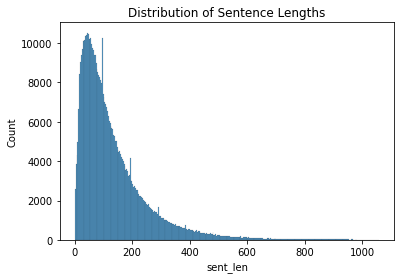

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x = train_data['sent_len'])
plt.title('Distribution of Sentence Lengths')

In [22]:
import numpy as np
output_seq_length = int(np.percentile(train_data['sent_len'], 90))
output_seq_length

287

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [24]:
len(tokenizer.word_counts)

250064

## Converting our sentences into numbers and padding them with zeroes

In [25]:
MAX_TOKENS = 250064 # to figure this out, we will tokenize our dataset
OUTPUT_SEQ_LENGTH = 256 #we still need a certain length, do a multiple of 8 to make things faster!

In [27]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(
    max_tokens = MAX_TOKENS,
    output_sequence_length = OUTPUT_SEQ_LENGTH
)

text_vectorizer.adapt(sentences)


In [28]:
vocab_len = len(text_vectorizer.get_vocabulary())
vocab_len

250064

## Creating the Attention Layer

In [29]:
class Attention(tf.keras.Model):
  def __init__(self, units):
    super(Attention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    score = tf.nn.tanh(
        self.W1(features) + self.W2(hidden_with_time_axis)
    )
    attention_weights = tf.nn.softmax(self.V(score), axis = 1)

    context_vector = attention_weights*features
    context_vector = tf.reduce_sum(context_vector, axis = 1)
    return context_vector, attention_weights

## Embedding Layer

(could possible use Word2Vec or GloVe, but for the sake of simplicity, we will be using randomly initialized vectors)

In [30]:
from tensorflow.keras import layers, Input 
from tensorflow.keras.layers import Embedding

In [31]:
EMBED_SIZE = 128
embed = Embedding(input_dim = vocab_len, output_dim = 128, mask_zero = True, name = 'token_embedding')

In [32]:
import random
target_sentence = random.choice(sentences)
target_sentence

"How dies this place have 3,5 stars.   I don't know where to start.  Food isn't even Sonny's quality,    No liquor here, beer only the owner doesn't want wine because he is a christian.   Really.   God turned water into wine     Well i will never be back.   Sonny's corporation would be disappointed."

In [33]:
#looking at our data

print(f"sentence before vectorization:\n {target_sentence}\n")

vectorized_sentence = text_vectorizer([target_sentence])

print(f"sentence after vectorization:\n {vectorized_sentence}\n")

embedded_sentence = embed(vectorized_sentence)

print(f"embedded sentence:\n {embedded_sentence}")

sentence before vectorization:
 How dies this place have 3,5 stars.   I don't know where to start.  Food isn't even Sonny's quality,    No liquor here, beer only the owner doesn't want wine because he is a christian.   Really.   God turned water into wine     Well i will never be back.   Sonny's corporation would be disappointed.

sentence after vectorization:
 [[  114 11453    16    31    23  1295   250     4    73   109   174     5
    488    30   403    74 24012   244    58  2428    45   293    69     2
    465   374   132   373    72    63    12     6  8933    62  1488   725
    295   171   373    92     4    65    87    29    57 24012  8947    52
     29   343     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0 

## Building the Model

In [98]:
#We can make it look prettier later

inputs = tf.keras.layers.Input(shape = [], dtype = 'string')
text_vectors = text_vectorizer(inputs)
token_embeddings = embed(text_vectors)
lstm = layers.Bidirectional(layers.LSTM(54, return_sequences = True), name = 'bi_lstm_0')(token_embeddings)
(lstm, forward_h, forward_c, backward_h, backward_c) = layers.Bidirectional(layers.LSTM(54, return_sequences = True, return_state = True), name = 'bi_lstm_1')(lstm)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])
context_vector, attention_weights = Attention(10)(lstm, state_h)
dense1 = layers.Dense(20, activation = 'relu')(context_vector)
dropout = layers.Dropout(0.05)(dense1)
output = layers.Dense(1, activation = 'sigmoid')(dropout)

model = tf.keras.Model(inputs = inputs, outputs = output, name = 'AttentionClassificationModel')


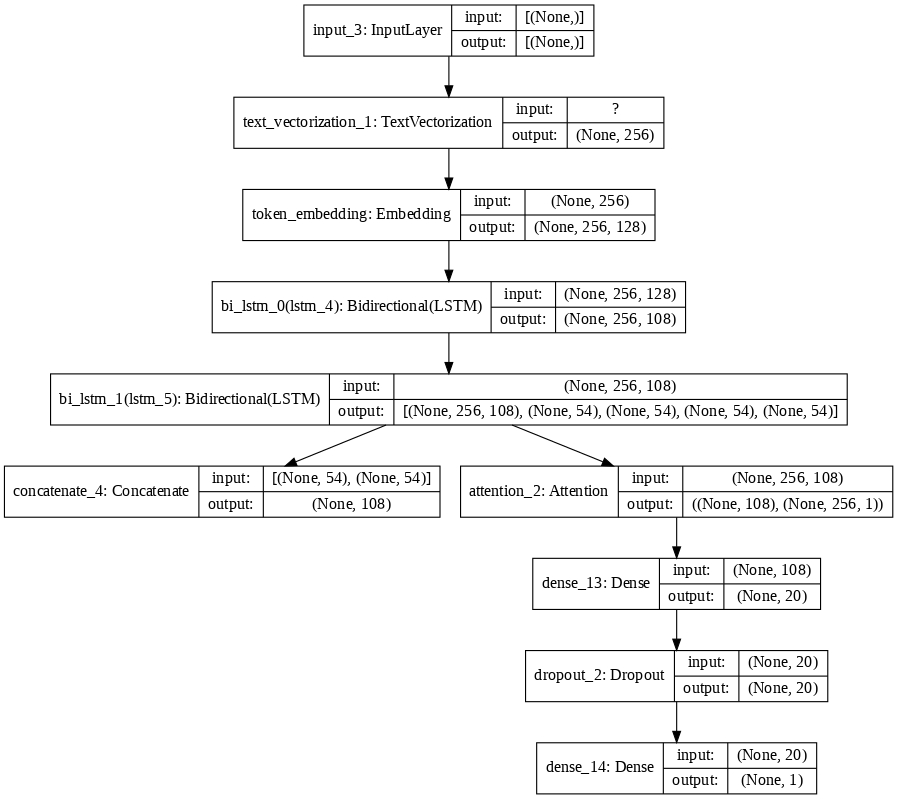

In [99]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True, dpi = 80)

In [100]:
model.summary()

Model: "AttentionClassificationModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
text_vectorization_1 (TextVecto (None, 256)          0           input_3[0][0]                    
__________________________________________________________________________________________________
token_embedding (Embedding)     (None, 256, 128)     32008192    text_vectorization_1[2][0]       
__________________________________________________________________________________________________
bi_lstm_0 (Bidirectional)       (None, 256, 108)     79056       token_embedding[2][0]            
_______________________________________________________________________

## Compiling the Model

In [101]:
METRICS = [
           keras.metrics.BinaryAccuracy(name = 'accuracy')
]

In [102]:
model.compile(loss= 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

## Making Datasets

In [87]:
##from sklearn.preprocessing import OneHotEncoder
#one_hot_encoder = OneHotEncoder(sparse = False)
#train_labels_one_hot = one_hot_encoder.fit_transform(labels.reshape(-1,1))
#train_labels_one_hot[:3], labels[:3]

In [88]:
#labels = labels.reshape(-1,1)
#labels[:5]

In [57]:
#sentences = sentences.reshape(-1,1)


In [89]:
# we want out model to work FASTER!

train_dataset = tf.data.Dataset.from_tensor_slices((sentences, labels))
train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [90]:
test_sent = test_data['sentence'].to_numpy()
test_labels = test_data['target'].apply(lambda x: x-1).to_numpy()

In [91]:
#test_labels = test_labels.reshape(-1,1)
test_labels[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [92]:
#test_sent = test_sent.reshape(-1,1)
#test_sent[:10]

In [93]:
val_dataset = tf.data.Dataset.from_tensor_slices((test_sent, test_labels))
val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [94]:
sentences[:10], test_sent[:10], labels, test_labels

(array(["Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life.",
        "I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through

## Fitting our Model

In [ ]:
# dont fit all of it because that would take a million years

model.fit(sentences,
          labels,
          batch_size = 100,
          epochs = 5,
          validation_split = 0.2
          )

Epoch 1/5
4480/4480 [==============================] - 7602s 2s/step - loss: 0.1676 - accuracy: 0.9334 - val_loss: 0.1144 - val_accuracy: 0.9553
Epoch 2/5
2661/4480 [================>.............] - ETA: 48:30 - loss: 0.0960 - accuracy: 0.9646